# E-Commerce Shipping ML Pipeline
This notebook includes:

- Data Loading & Exploration

- Preprocessing (Scaling, Encoding)
- Pre-Modeling (metrics, thresholds, candidate models, hypotheses)
- Modeling & Evaluation (ROC, PR curves, metrics summary)


**Import Libraries**
We start by importing the required Python libraries for:
- Data manipulation (`pandas`, `numpy`)

- Visualization (`matplotlib`, `seaborn`)
- Machine learning model building (`scikit-learn`)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, auc, precision_recall_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 4)

**Load Dataset**

We load the processed training dataset and inspect its structure.


In [14]:
df = pd.read_csv("../data/processed/train_split.csv")
print(f"Dataset loaded with shape: {df.shape}")
display(df.head())

Dataset loaded with shape: (8799, 11)


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,3,5,178,3,1,0,7,4135,0
1,0,2,6,3,202,4,2,0,3,4496,1
2,3,2,2,5,277,3,2,1,6,1032,0
3,2,2,5,5,219,2,2,1,4,4289,0
4,2,0,6,3,296,4,1,0,4,1650,0


**Separate Features and Target**
We split the dataset into:
- `X`: independent variables (features)

- `y`: dependent variable (target)

We also identify **numerical** and **categorical** features.

In [15]:
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']
Categorical features: []


**Build Preprocessing Pipelines**
We create:
- **Numerical pipeline** → StandardScaler

- **Categorical pipeline** → OneHotEncoder

Then combine them using `ColumnTransformer`.

In [16]:
num_pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline([("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features)
])

print("Data preprocessing pipeline created.")

Data preprocessing pipeline created.


**Scaling Check**

We visualize the distribution of numerical features **before** and **after** scaling.

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


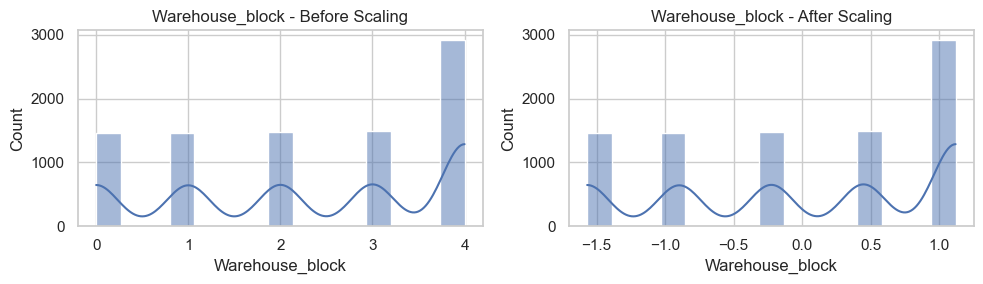

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


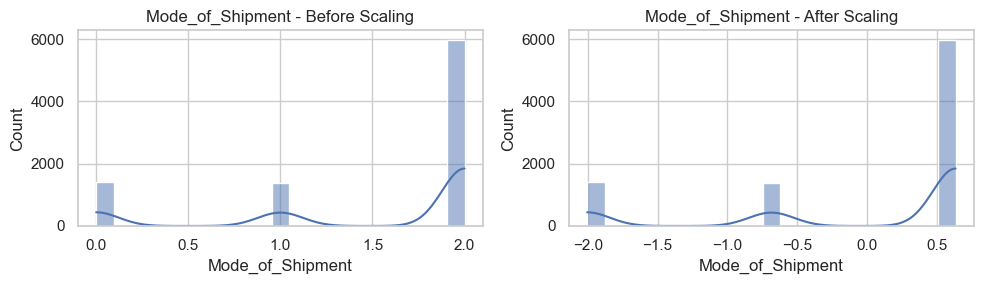

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


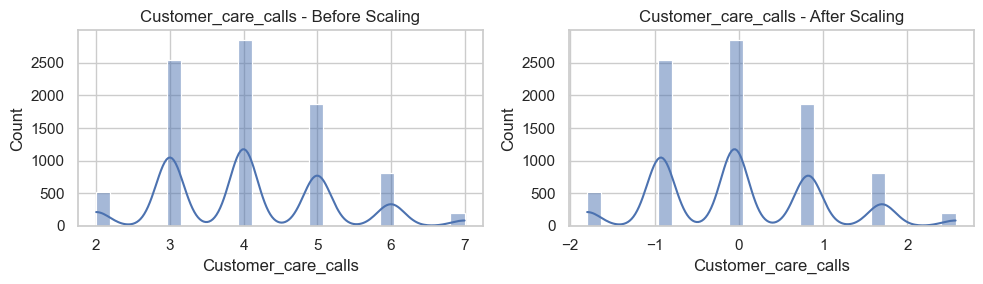

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


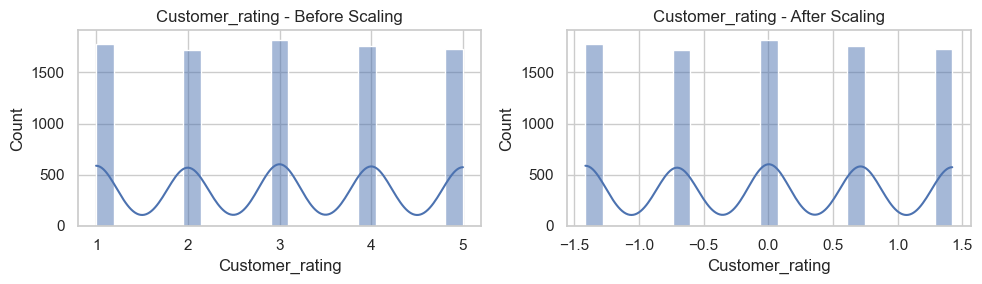

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


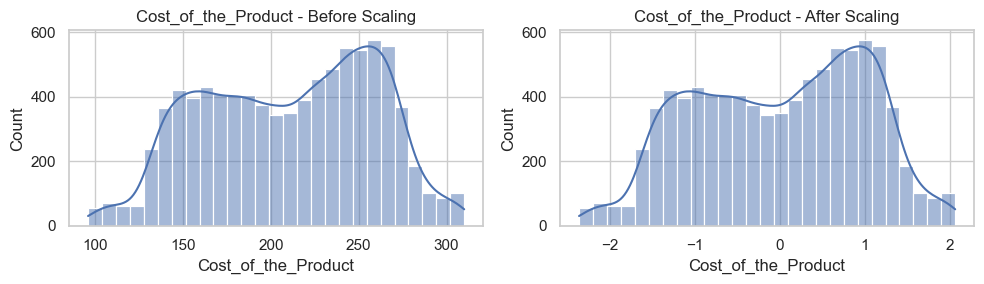

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


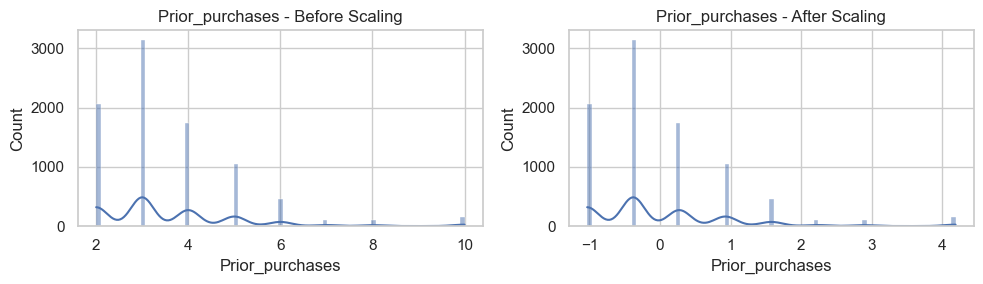

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


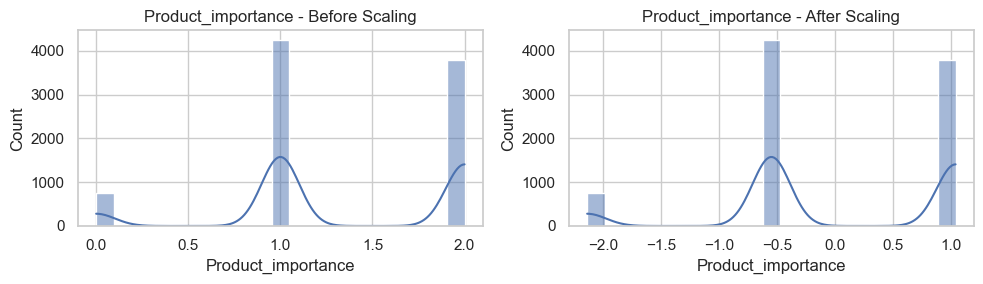

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


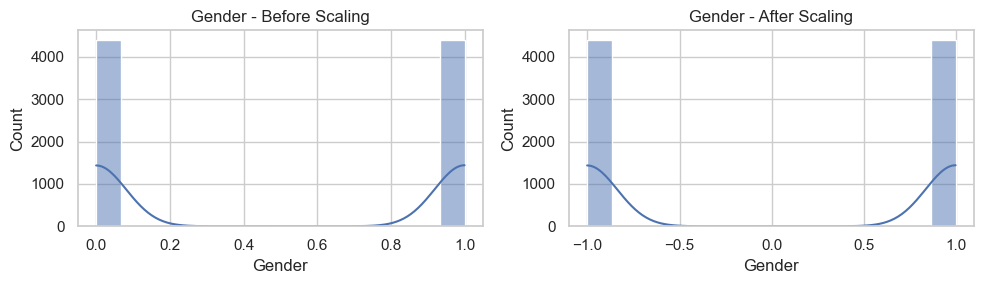

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


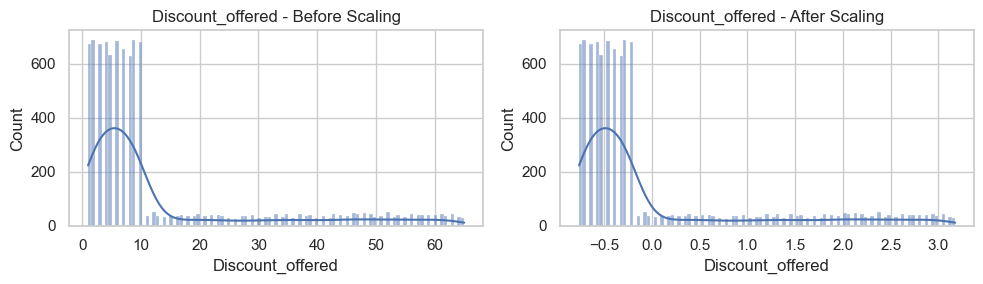

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


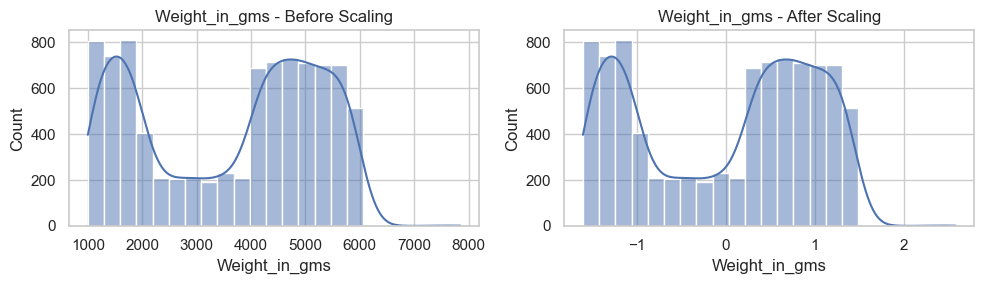

In [17]:
X_num_before = X[numerical_features]
X_num_after = num_pipeline.fit_transform(X_num_before)
X_num_after_df = pd.DataFrame(X_num_after, columns=numerical_features)

for col in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(X_num_before[col], ax=axes[0], kde=True)
    axes[0].set_title(f"{col} - Before Scaling")
    sns.histplot(X_num_after_df[col], ax=axes[1], kde=True)
    axes[1].set_title(f"{col} - After Scaling")
    plt.tight_layout()
    plt.show()

**Encoding Check**

We check:
- Number of columns after One-Hot Encoding

- Sparsity (percentage of zeros) in the encoded matrix


In [18]:
ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(X[categorical_features])
num_new_columns = len(ohe.get_feature_names_out())
print("Number of new columns from categorical encoding:", num_new_columns)

X_cat_transformed = ohe.transform(X[categorical_features])
if X_cat_transformed.shape[1] > 0:
    sparsity = 1 - (X_cat_transformed.nnz / (X_cat_transformed.shape[0] * X_cat_transformed.shape[1]))
    print(f"Sparsity after encoding: {sparsity:.4f}")
else:
    print("No categorical features found, skipping sparsity calc.")

X_transformed = preprocessor.fit_transform(X)
print("Shape before preprocessing:", X.shape)
print("Shape after preprocessing:", X_transformed.shape)

Number of new columns from categorical encoding: 0
No categorical features found, skipping sparsity calc.
Shape before preprocessing: (8799, 10)
Shape after preprocessing: (8799, 10)


**Train-Test Split**

We split the dataset into:
- Training set (80%)

- Testing set (20%)

Stratified sampling is used to maintain target distribution.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)

**Define Metrics and Thresholds**
We define:

- Evaluation metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC

- Minimum performance thresholds


In [20]:
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score,
    "ROC-AUC": roc_auc_score
}

thresholds = {
    "Accuracy": 0.80,
    "Precision": 0.75,
    "Recall": 0.70,
    "F1 Score": 0.72,
    "ROC-AUC": 0.80
}

print("\nThresholds:")
for m, t in thresholds.items():
    print(f"{m}: ≥ {t}")


Thresholds:
Accuracy: ≥ 0.8
Precision: ≥ 0.75
Recall: ≥ 0.7
F1 Score: ≥ 0.72
ROC-AUC: ≥ 0.8


**Candidate Models**

We test two models:
- Logistic Regression

- Random Forest

In [21]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

notes = {
    "Logistic Regression": "Simple, interpretable, may struggle with non-linearity.",
    "Random Forest": "Captures non-linear patterns, robust to noise, less interpretable."
}

print("\nPre-training notes:")
for name, note in notes.items():
    print(f"{name}: {note}")


Pre-training notes:
Logistic Regression: Simple, interpretable, may struggle with non-linearity.
Random Forest: Captures non-linear patterns, robust to noise, less interpretable.


**Train & Evaluate Models**

We train models, evaluate performance, and plot ROC and PR curves.

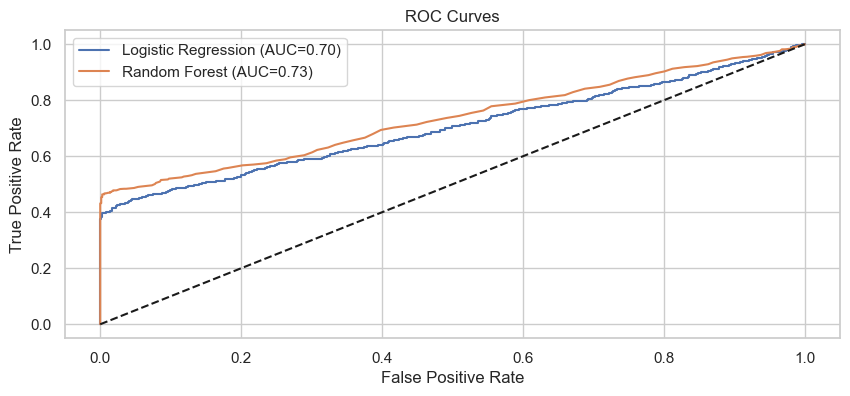

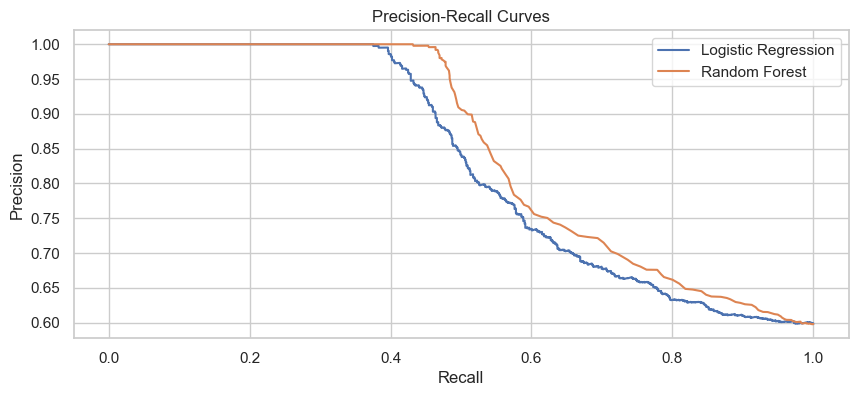

In [22]:
results = []

# ROC Curve
plt.figure()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    row = {"Model": name}
    for m, func in metrics.items():
        if m == "ROC-AUC" and y_proba is not None:
            row[m] = func(y_test, y_proba)
        elif m == "ROC-AUC":
            row[m] = np.nan
        else:
            row[m] = func(y_test, y_pred)
    results.append(row)

    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure()
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=name)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()

**Summary Results**

We compile all metrics into a single summary table.

In [23]:
results_df = pd.DataFrame(results)
print("\nFinal Evaluation Summary:")
display(results_df)


Final Evaluation Summary:


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.620455,0.683206,0.680608,0.681905,0.702194
1,Random Forest,0.649432,0.743561,0.631179,0.682776,0.734496


In [ ]:

best_model_name = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

os.makedirs("models", exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"models/{best_model_name.replace(' ', '_').lower()}_{timestamp}.pkl"
joblib.dump(best_model, "../models/ecommerce_shipping_model.pkl")

print(f"Model '{best_model_name}' saved at: {model_filename}")

Model 'Random Forest' đã được lưu tại: models/random_forest_20250811_192637.pkl
